# Proyecto

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataSet = np.load('proyecto_training_data.npy')

In [3]:
dataP = dataSet[:int(len(dataSet)*0.8)]
dataA = dataSet[int(len(dataSet)*0.8):]
print(len(dataSet))
print(len(dataP))
print(len(dataA))
df = pd.DataFrame(dataP, columns = ['X0','X1','X2','X3','X4','X5'])
dfA = pd.DataFrame(dataA, columns = ['X0','X1','X2','X3','X4','X5'])
#print(df)
#dfA.describe()

1460
1168
292


In [4]:
print(dfA)

           X0    X1      X2    X3      X4     X5
0    235000.0   6.0  1236.0   7.0  1935.0  120.0
1    625000.0  10.0  1831.0  10.0  1995.0  118.0
2    171000.0   6.0  1118.0   6.0  1977.0   76.0
3    163000.0   6.0  1261.0   6.0  1958.0   76.0
4    171900.0   7.0   625.0   5.0  2006.0   35.0
..        ...   ...     ...   ...     ...    ...
287  175000.0   6.0   953.0   7.0  1999.0   62.0
288  210000.0   6.0  2073.0   7.0  1978.0   85.0
289  266500.0   7.0  1188.0   9.0  1941.0   66.0
290  142125.0   5.0  1078.0   5.0  1950.0   68.0
291  147500.0   5.0  1256.0   6.0  1965.0   75.0

[292 rows x 6 columns]


**Media de cada variable:**

In [5]:
#print(df.iloc[:,[0]])
median = np.mean(df)
print(median[0],median[1],median[2],median[3],median[4],median[5])


180590.27739726027 6.101027397260274 1156.3236301369864 6.4854452054794525 1971.451198630137 69.94698544698545


**Valor máximo**

In [6]:
maximum = np.amax(df)
for i in range (len(maximum)) :
    print(maximum[i])

755000.0
10.0
3228.0
14.0
2010.0
313.0


**Valor mínimo**

In [7]:
minimum = np.amin(df)
print(minimum)

X0    34900.0
X1        1.0
X2      334.0
X3        2.0
X4     1875.0
X5       21.0
dtype: float64


**Rangos**  
Reemplazar los valores NAN con "0" de cada columna:

In [8]:
df.fillna(0)
#df['X5'] = df['X5'].replace(np.nan, 0) #no me funciono el otro

,X0,X1,X2,X3,X4,X5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,0.0
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


In [9]:
ranges = []
print(df.iloc[:,[0]])
for i in range(len(df.count())):
        ranges.append(np.ptp(df.iloc[:,[i]]))
print(ranges)

            X0
0     208500.0
1     181500.0
2     223500.0
3     140000.0
4     250000.0
...        ...
1163  108959.0
1164  194000.0
1165  233170.0
1166  245350.0
1167  173000.0

[1168 rows x 1 columns]
[720100.0, 9.0, 2894.0, 12.0, 135.0, nan]


**Desviacion estandar**

In [10]:
stdDf = np.std(df)
print(stdDf)

X0    78781.951080
X1        1.377435
X2      373.620332
X3        1.608452
X4       29.938882
X5       23.465955
dtype: float64


## **Histograma de Variables**

In [11]:
import seaborn as sns

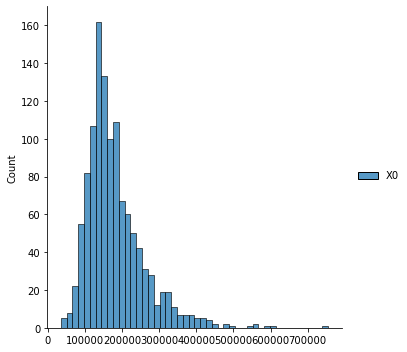

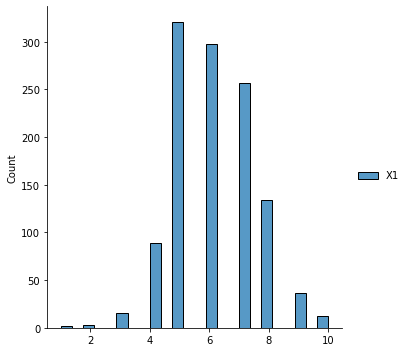

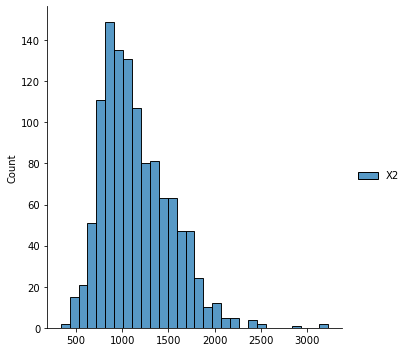

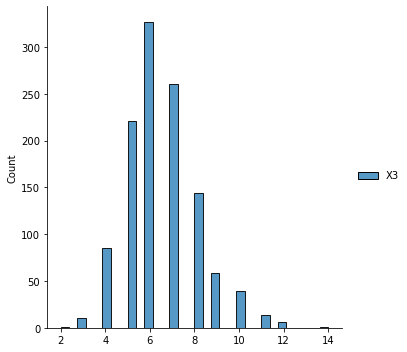

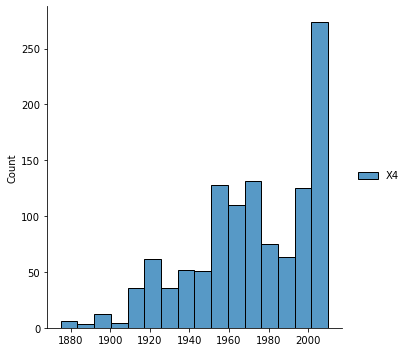

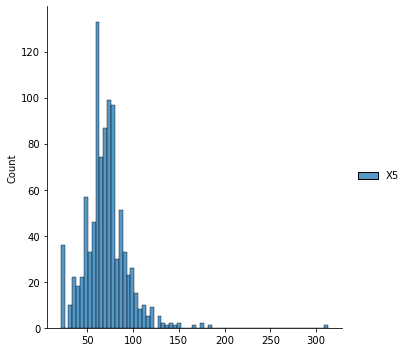

In [12]:
#ax = sns.displot(df.iloc[:,['X0']])
for i in range(len(df.count())):
    ax = sns.displot(df.iloc[:,[i]])

In [13]:
print(df)

            X0   X1      X2   X3      X4    X5
0     208500.0  7.0   856.0  8.0  2003.0  65.0
1     181500.0  6.0  1262.0  6.0  1976.0  80.0
2     223500.0  7.0   920.0  6.0  2001.0  68.0
3     140000.0  7.0   961.0  7.0  1915.0  60.0
4     250000.0  8.0  1145.0  9.0  2000.0  84.0
...        ...  ...     ...  ...     ...   ...
1163  108959.0  4.0  1258.0  6.0  1969.0  60.0
1164  194000.0  5.0  1432.0  5.0  1978.0   NaN
1165  233170.0  7.0  1502.0  7.0  2009.0  79.0
1166  245350.0  8.0  1694.0  7.0  2008.0  64.0
1167  173000.0  6.0   959.0  7.0  2000.0  58.0

[1168 rows x 6 columns]


**Calculo de coeficiente de correlacion entre Xi y Y**

$$r_i = {\frac{\sum(x-\hat{x})(y-\hat{y})}{\sqrt{\sum(x-\hat{x})^2}\sqrt{\sum(y-\hat{y})^2}}} $$

In [14]:
median

x_median = df - median #se resta cada columna por su media Xi - Xmean
x_medianpow2 = np.power((x_median),2)#se eleva cada valor al doble para obtener (Xi-Xmean)^2
y_aux = np.full(x_median.shape,x_median.iloc[:,[0]])#creación de una matriz con los valores de (Yi-Ymean)
x__mean_y__mean = x_median * y_aux#se multiplica (Xi-Xmean) * (Yi-Ymean)
ri = []

Y_Ymean_pow2 =np.sqrt(np.sum(np.array(x_medianpow2.iloc[:,[0]])))#
print(Y_Ymean_pow2)
#print(x_medianpow2)

for i in range(1,6):
    ri.append(float(np.sum(x__mean_y__mean.iloc[:,[i]])/np.sqrt(np.sum(np.array(x_medianpow2.iloc[:,[i]])))*Y_Ymean_pow2))

print(ri[0])
print(type(ri))



2692453.1403751713
5755875179794.091
<class 'list'>


In [15]:
#calculando con la funcion COV
def covariance(x,y):
    #print("X",x,"Y",y)
    yc = (y - np.mean(y))
    xc = (x - np.mean(x))
    return np.sum(yc*xc)/len(x)-1

def correlation(x,y):
    cov = round(covariance(x,y),3)
    print("Covariance:",cov)
    return cov / np.std(x)*np.std(y)

corrcoef = []
for i in range(1,6):
      corrcoef.append(round(correlation(np.array(df.iloc[:,[0]]),np.array(df.iloc[:,[i]])),4))
print(corrcoef)


Covariance: 86160.444
Covariance: 18140172.581
Covariance: 71556.949
Covariance: 1259917.255
Covariance: nan
[1.5064, 86029.0612, 1.4609, 478.7964, nan]


<Figure size 432x288 with 0 Axes>

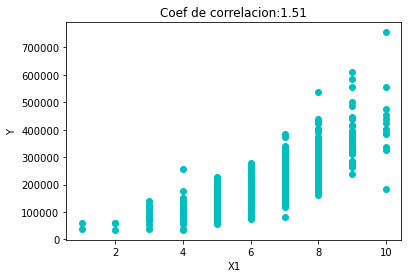

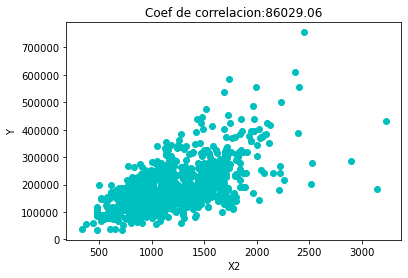

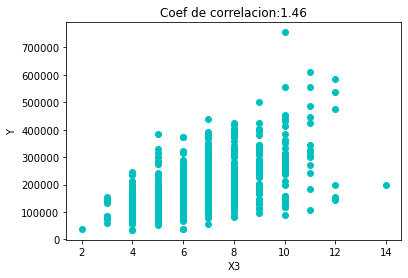

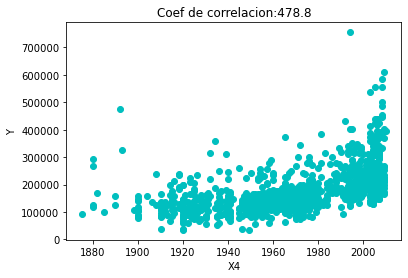

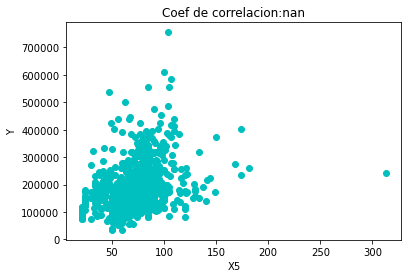

In [16]:
fig = plt.figure()

for i in range(1,6):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(df.iloc[:,[i]], df.iloc[:,[0]],color="c") 
    ax.set_xlabel('X'+str(i))
    ax.set_ylabel('Y')
    ax.set_title("Coef de correlacion:"+str(round(corrcoef[i-1],2)))
    plt.show()

    

## **Función para entrenar un modelo de regresión lineal de una variable**
\begin{equation*}
\ y = mx + b
\end{equation*}

In [17]:
#print(dfA["X5"].values)
dfA['X5'] = df['X5'].fillna(0)
#print(dfA["X5"].values)
print("")


In [18]:
def regresionLineal(x,y,epochs,impErrCad,lr,params,varX):
    varX = "X"+str(varX)
    #matriz X
    matX = np.full((len(x),2),1)
    matX[:,0] = x 
    
    #matriz Y
    matY = np.full((len(y),2),1)
    matY[:,0] = y 
    
    #vector y_hat
    #y_hat = np.matmul(matX,param) #no funciono
    y_hat = x*params[0]+params[1]
    
    #error
    error = (np.power((y_hat-y),2))/2
    errorPromedio = np.mean(error)
    
    #gradiente M
    gradienteM = (y_hat - y)*x
    gradPromM = np.mean(gradienteM)#valor promedio del gradiente de M
    
    #gradiente B
    gradienteB = (y_hat - y)*1
    gradPromB = np.mean(gradienteB)#valor promedio del gradiente de B
    
    nuevaM = round(params[0] - lr *gradPromM,6) #nuevo valor de la pendiente M
    nuevaB = round(params[1] - lr *gradPromB,6) #nuevo valor del intercepto B 
    
    #agregar la informacion a un diccionario o lista
    if varX in listaErrores:
        
        listaErrores[varX].append(errorPromedio)#agrego el error en cada iteracion
        
        modeloLineal[varX].append((nuevaM,nuevaB))#agrego el modelo lineal en cada iteraccion
        
        listErrores = listaErrores.get(varX)
        
        if validarError(listErrores,errorPromedio) == True: #se valida si el error converge o es mayor al anterior para terminar
            print("El error aumento, termina el entrenamiento")
            print("******************** FIN EPOCHS %s******************"%epochs,varX)
            return params[0], params[1], True
        
    else:
        listaErrores[varX] = [errorPromedio]
        modeloLineal[varX] = [(nuevaM,nuevaB)]
        
    
    #imprimir informacion del modelo
    '''if  epochs % impErrCad == 0 :
        print("******************** INI EPOCHS %s******************"%epochs,varX)
        print("Parametros",params)
        #print("Y_hat",y_hat)
        #print("ERROR:",error)
        print("ERROR Promedio:",errorPromedio)
        print("GradienteM:",gradPromM)
        print("GradienteB:",gradPromB)
        print("******************** FIN EPOCHS %s******************"%epochs)
    '''
    return nuevaM,nuevaB,False

In [26]:
#estructuras de datos para almacenar el modelo
listaErrores = {}
modeloLineal = {}

def funcionLineal(epochs,imprimirErrorCada,lr,m,b):
    
    vecY = df.iloc[:,[0]].values[:,0]
    #print("VECTOR Y",vecY)
    for varX in range (1,2) :#recorriendo todas las variables X
        m = b = err = 0
        for i in range (epochs):
            params = np.array((m,b))
            vecXi = df.iloc[:,[varX]].values[:,0]
            m,b,err = regresionLineal(vecXi,vecY,i,imprimirErrorCada,lr,params,varX)
            #Si la variable err biene True se detiene ya que el modelo termino
            if err == True:
                print("forced exit!")
                break
        #modeloLineal["X"+str(varX)]= {"m":m,"b":b}

            
funcionLineal(15000,1000,0.01,0,0)                                   
#print(modeloLineal)

In [25]:
def validarError(lista,error):
    #print("Validando error",error,lista[-1])
    #print(lista[-1],error,error- lista[-1])
    if error  > lista[-2]:
        print("El error aumento!",lista[-2],error,error - lista[-2] )
        return True
    return False

In [ ]:
vecX = np.array((65,80,68))
vecY = np.array((208.5,181.5,223.5))
m,b = 0,0

for i in range(10):
    params = np.array((m,b))
    m,b = regresionLineal(vecX,vecY,i,4,0.0001,params,1)
    #print("**************************************")


In [ ]:
#listaErrores["j"]= 5
print(modeloLineal)

## **Graficando los errores**

In [ ]:
for key,value in listaErrores.items():
    print("")
    #graficarErrores(key,value)
    '''
    vecY = np.linspace(0,len(value),len(value),dtype="int")
    #print(key,value)
    #print(vecY)
    
    plt.plot(vecY,value)
  
    # naming the x axis
    plt.xlabel(key)
    # naming the y axis
    plt.ylabel('Y')

    # giving a title to my graph
    plt.title('%s vrs Y'%key)

    # function to show the plot
    plt.show()
    '''
    

In [30]:
def showLineGraph(vecY,vecX,y_real,title):
    
    plt.scatter(vecX, y_real,  color='black')
    plt.plot(vecX,vecY)

    # naming the x axis
    plt.xlabel('X')
    # naming the y axis
    plt.ylabel('Y')

    # giving a title to my graph
    plt.title(title)

    # function to show the plot
    plt.show()

In [ ]:
def graficarErrores(xAxis,listaErrores):
    vecY = np.linspace(0,len(listaErrores),len(listaErrores),dtype="int")
    #print(key,value)
    #print(vecY)

    plt.plot(vecY,listaErrores)

    # naming the x axis
    plt.xlabel(xAxis)
    # naming the y axis
    plt.ylabel('Y')

    # giving a title to my graph
    plt.title('%s vrs Y'%key)

    # function to show the plot
    plt.show()
    

## **Evolución del modelo entrenado en el tiempo**

In [28]:
def graphYAlongTime(modelHistory, n, vecX, y_real):
    #print("MODELO LINEAL:",modelHistory)
    for index, modelo in enumerate(modelHistory):
        if index % n == 0:
            m,b = modelo
            #print("index:",index,"modelo:",modelo[0],modelo[1],"VEC X:",vecX)
            y_hat = m * vecX  + b
            #print(y_hat,y_real)
            showLineGraph(y_hat,vecX,y_real, "y = "+str(m)+ " * X + "+str(b))
    

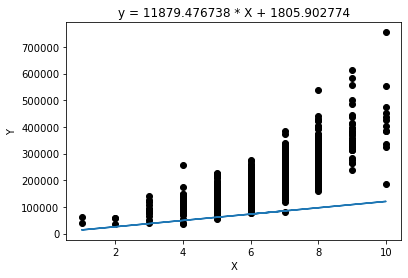

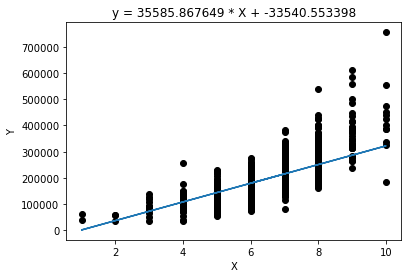

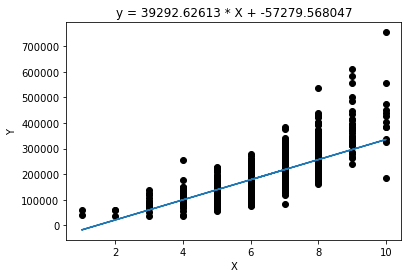

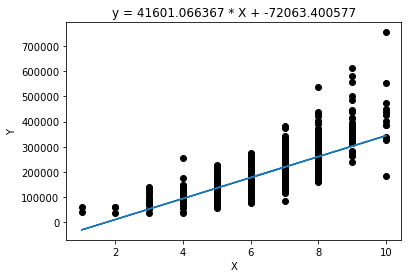

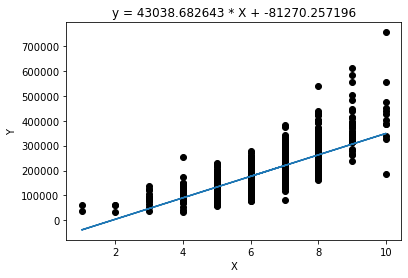

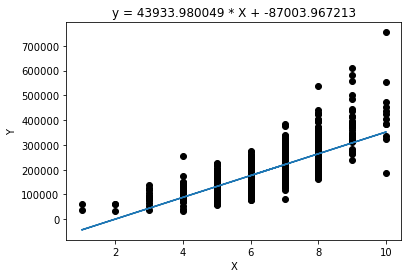

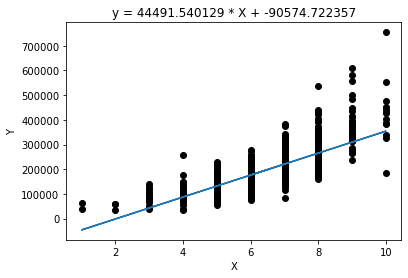

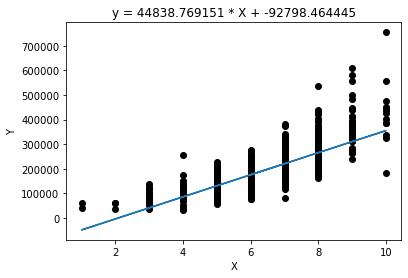

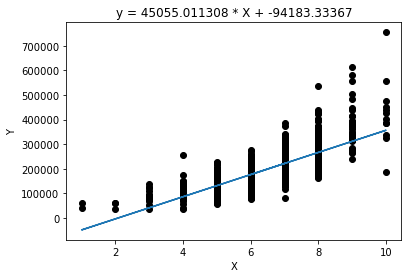

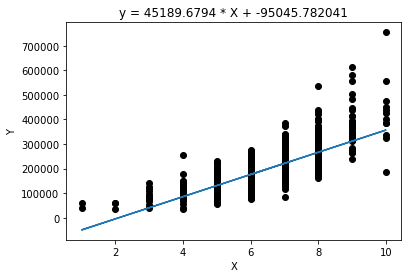

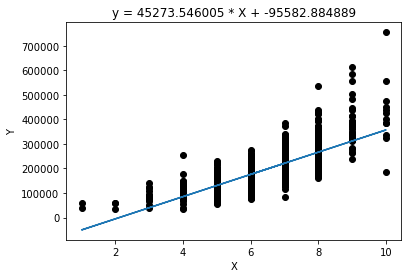

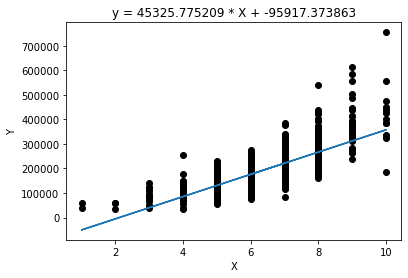

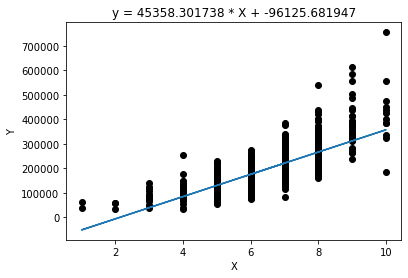

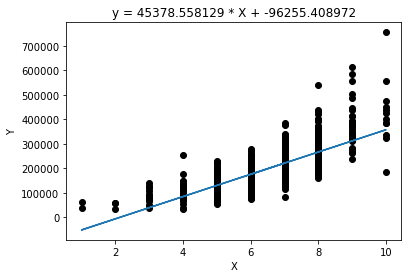

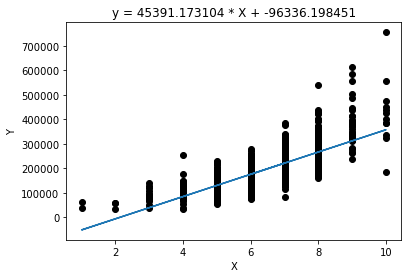

In [31]:
graphYAlongTime(modeloLineal['X1'],1000,df['X1'].values,df['X0'].values)

## Usando Scikit Learn


In [38]:
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split

Coefficients: 
 [45411.99877916]
Coefficients: 
 -96469.57131873982


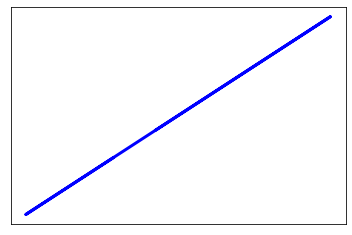

'\nprint("Valor de la pendiente:",lr.coef_)\nprint("Valor de la intersección:",lr.intercept_)\nprint("")\nprint("Ecuación: Y =",lr.coef_,"x +",lr.intercept_)\n\nprint("Precision del modelo:")\nprint(lr.score(x_train,y_train))\n\n'

In [39]:
#Y = df.iloc[:,[0]].values[:,0]
Y = df['X0'].values
#X = df.iloc[:,[1]].values[:,0]
X = df['X1'].values

#X_test = dfA.iloc[:,[1]].values[:,0]
X_test = dfA['X1'].values
#print(X.shape)

X = np.reshape(X,(-1,1))
X_test = np.reshape(X_test,(-1,1))
#Y = np.reshape(Y,(-1,1))

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, Y)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Coefficients: \n', regr.intercept_)
# The mean squared error

# Plot outputs
#plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

'''
print("Valor de la pendiente:",lr.coef_)
print("Valor de la intersección:",lr.intercept_)
print("")
print("Ecuación: Y =",lr.coef_,"x +",lr.intercept_)

print("Precision del modelo:")
print(lr.score(x_train,y_train))

'''

In [40]:
def returnLinerModelWithScikit(vecX,vecY):
    X = np.reshape(vecX,(-1,1))

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X, Y)
    
    return regr.coef_,regr.intercept_


In [41]:
m,b = returnLinerModelWithScikit(df['X1'].values,df['X0'].values)
print(m[0],b)

45411.998779159156 -96469.57131873982


## **Predicción de los modelos, manual y scikit**

In [22]:
def returnPrediccion(modeloManual,  modeloScikit, vectorX):
    yManual = evaluarModeloLineal(vectorX, modeloManual)
    yScikit = evaluarModeloLineal(vectorX, modeloScikit)
    yProm = (yManual+yScikit)/2 #promedio de la evaluacion de ambas
    
    return yManual,yScikit,yProm

In [48]:
#retornamos Y evaluado en el modelo enviado
def evaluarModeloLineal(vecX, modelo):
    m,b = modelo[0],modelo[1]
    y_hat =  m * vecX  + b
    return y_hat

[1.31508634e+09 1.31509130e+09 1.31508878e+09]


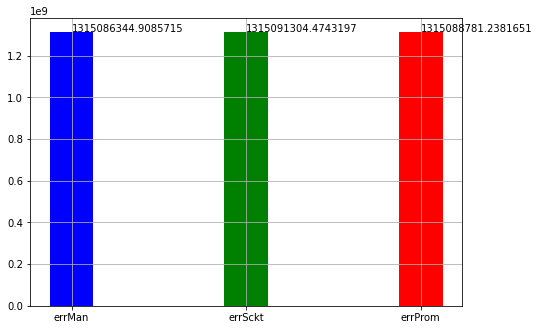

In [134]:
modeloManual = np.array(modeloLineal['X1'][-1])
modeloScikit = np.array((m[0],b))
#print(modeloManual,modeloScikit)

#print(type(modeloLineal['X1'][-1]))
predicciones = returnPrediccion(modeloManual, modeloScikit, dfA['X1'].values)

#print(predicciones[0])
#print(predicciones[1])
#print(predicciones[2])

vecY = dfA['X0'].values 

errorManual = calcularErrorEntreDosVec(vecY,predicciones[0])
errorScikit = calcularErrorEntreDosVec(vecY,predicciones[1])
errorProm = calcularErrorEntreDosVec(vecY,predicciones[2])
graficarError(np.array((errorManual,errorScikit,errorProm)))

In [66]:
#funcion que recibe 2 vectores y retonar su error
def calcularErrorEntreDosVec(vec1,vec2):
    diff = vec1 - vec2
    diff = np.power(diff,2)/2
    return np.mean(diff)

In [133]:
colors = ['b','g','r']

def graficarError(errores):
    print(errores)
    
    #langs = ['errMan', 'errScit', 'errProm']
    
    X = np.arange(1)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar("errMan", errores[0], color = 'b', width = 0.25)
    ax.bar("errSckt", errores[1], color = 'g', width = 0.25)
    ax.bar("errProm", errores[2], color = 'r', width = 0.25)
    
    for index,data in enumerate(errores):
        plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))
        
    ax.grid(zorder=0)
